In [1]:
from IPython.display import Image
#Image("/location")

In [2]:
import os
os.chdir("C:/Users/h343006/time_series_analysis/")

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
electricTimeSeries = pd.read_csv('Time_Series_data.csv',header=0,index_col=0)
electricTimeSeries.shape

(148920, 5)

In [6]:
electricTimeSeries.head()

,tempc,year,month,day,hour
load,,,,,
995.298392,0.773603,2002,1,1,0
981.195477,4.663511,2002,1,1,1
971.305257,3.482669,2002,1,1,2
971.262963,-4.578652,2002,1,1,3
982.535591,0.827004,2002,1,1,4


In [7]:
#electricTimeSeries['Load'] = electricTimeSeries.index
electricTimeSeries = electricTimeSeries.reset_index()
electricTimeSeries.head()

,load,tempc,year,month,day,hour
0,995.298392,0.773603,2002,1,1,0
1,981.195477,4.663511,2002,1,1,1
2,971.305257,3.482669,2002,1,1,2
3,971.262963,-4.578652,2002,1,1,3
4,982.535591,0.827004,2002,1,1,4


In [8]:
electricTimeSeries.index = pd.to_datetime(electricTimeSeries['year'].map(str)+'-'+electricTimeSeries['month'].map(str)+'-'+electricTimeSeries['day'].map(str))
electricTimeSeries.head()

,load,tempc,year,month,day,hour
2002-01-01,995.298392,0.773603,2002,1,1,0
2002-01-01,981.195477,4.663511,2002,1,1,1
2002-01-01,971.305257,3.482669,2002,1,1,2
2002-01-01,971.262963,-4.578652,2002,1,1,3
2002-01-01,982.535591,0.827004,2002,1,1,4


In [9]:
data =electricTimeSeries.resample('M').sum()
data.head()

,load,tempc,year,month,day,hour
2002-01-31,737504.874022,5254.430700,1489488,744,11904,8556
2002-02-28,664715.103233,4769.571882,1345344,1344,9744,7728
2002-03-31,679546.276492,7987.188302,1489488,2232,11904,8556
2002-04-30,643161.667656,12810.917367,1441440,2880,11160,8280
2002-05-31,719354.043499,15773.072000,1489488,3720,11904,8556


In [10]:
data = data[['load']]

## Moving Average Method

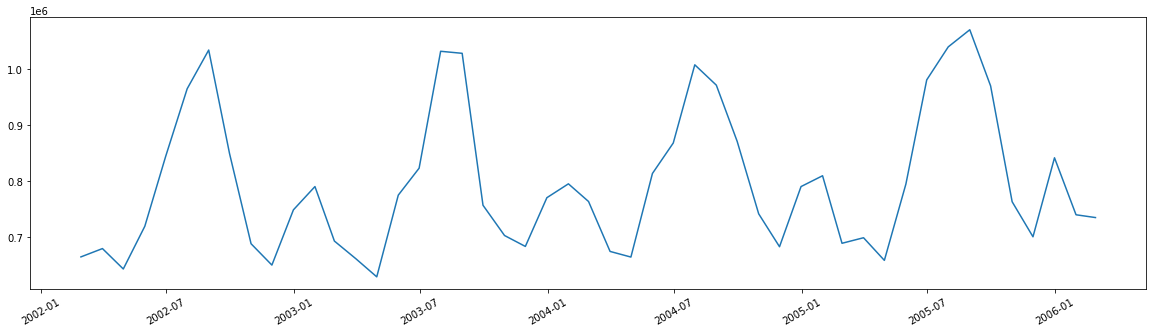

In [11]:
plt.plot(data[1:50]['load'])
plt.xticks(rotation = 30)
plt.show()

In [12]:
#rolling average transform

rollingSeries = data[1:50].rolling(window=5)
rollingmean = rollingSeries.mean() # finding rolling mean MA(5)

print(rollingmean.head(10))

                     load
2002-02-28            NaN
2002-03-31            NaN
2002-04-30            NaN
2002-05-31            NaN
2002-06-30  710130.846007
2002-07-31  770118.656193
2002-08-31  840951.534494
2002-09-30  882137.275426
2002-10-31  875906.853265
2002-11-30  837154.148993


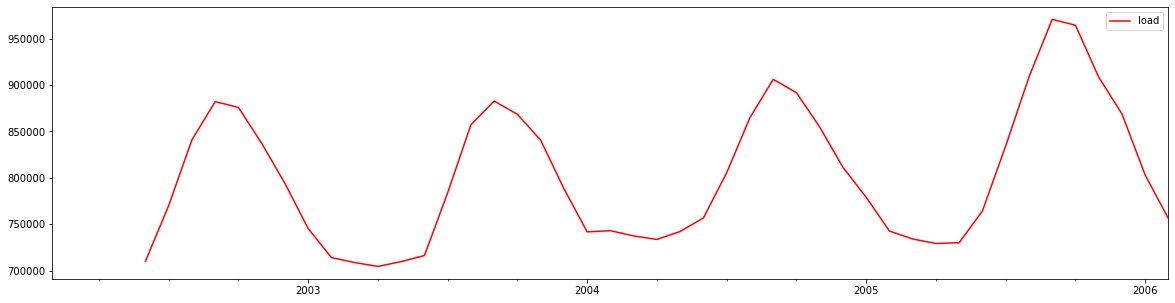

In [13]:
#plot transform data
rollingmean.plot(color="red")
plt.show()

In [14]:
#Now increase the window size

rollingSeries = data[1:50].rolling(window=10)
rollingmean = rollingSeries.mean() # finding rolling mean MA(5)

print(rollingmean.head(10))

                   load
2002-02-28          NaN
2002-03-31          NaN
2002-04-30          NaN
2002-05-31          NaN
2002-06-30          NaN
2002-07-31          NaN
2002-08-31          NaN
2002-09-30          NaN
2002-10-31          NaN
2002-11-30  773642.4975


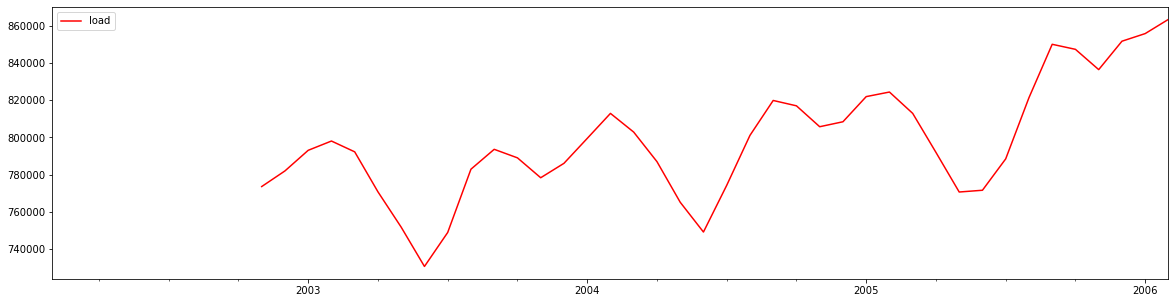

In [15]:
#plot transform data
rollingmean.plot(color="red")
plt.show()

## Simple exponential smoothing

In [16]:
df = data[1:50]

In [17]:
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(df).fit(smoothing_level=0.8,optimized=False)


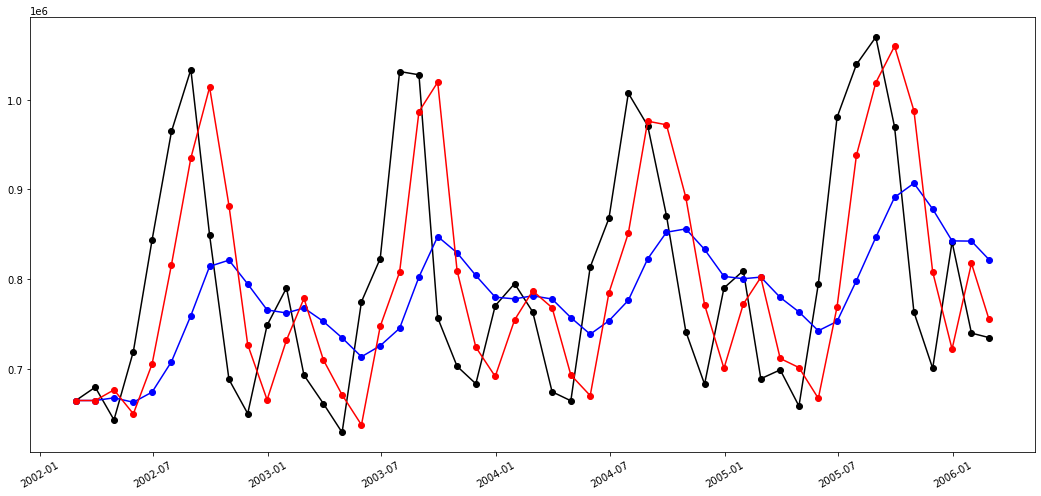

In [18]:
plt.figure(figsize=(18,8))
plt.plot(data[1:50],marker = 'o',color = 'black')
plt.xticks(rotation = 30)

plt.plot(fit1.fittedvalues,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')

plt.show()

## Holt method for exponential Smoothing

In [19]:
fit1 = Holt(df).fit() # assumtion is Liner trend
fit2 = Holt(df,exponential=True).fit() # Exponential tren


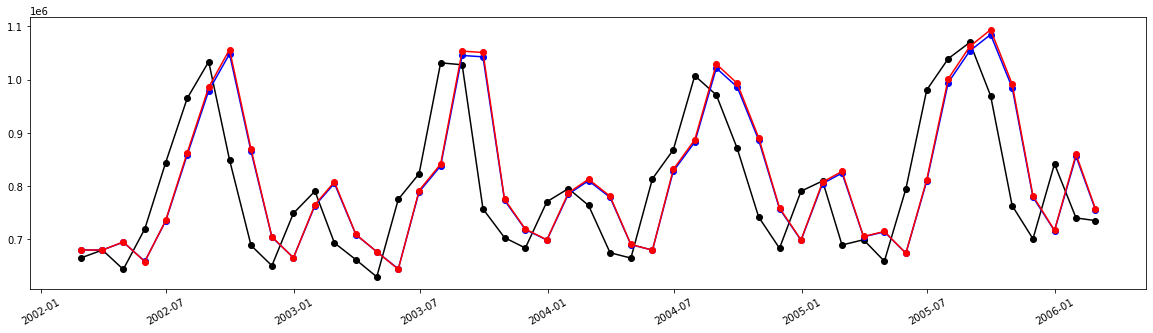

In [20]:
plt.plot(df,marker = 'o',color = 'black')
plt.xticks(rotation = 30)

plt.plot(fit1.fittedvalues,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')

plt.show()

## Seasonal Decompose and Adfuller test
To understand, How to decompose the data and how to do Stationarity check

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd


# Decompostion
### * Additive : Definition of additive time series (Value = Base Level + Trend + Seasonality + Error)

### * Multiplicative : Definition of multiplicative time series (Value = Base Level * Trend * Seasonality * Error)



In [24]:
data = electricTimeSeries[['load']]

In [25]:
#removing the index, since I want to check the behaviour of load
data.reset_index(inplace=True)

In [26]:
data.head()

,index,load
0,2002-01-01,995.298392
1,2002-01-01,981.195477
2,2002-01-01,971.305257
3,2002-01-01,971.262963
4,2002-01-01,982.535591


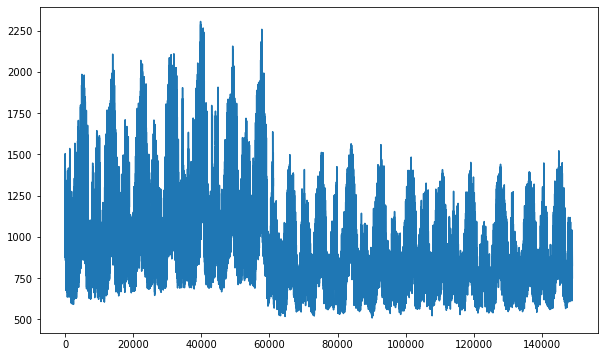

In [27]:
plt.rcParams.update({'figure.figsize' : (10,6)})
plt.plot(data['load'])
plt.show()

In [28]:
#Multiplicative Decomposition
mul_result = seasonal_decompose(data['load'],model='multiplicative',period=1)# period is nothing, frequency of one period of time

#Additive Decompositon
add_result = seasonal_decompose(data['load'],model='additive',period=1)

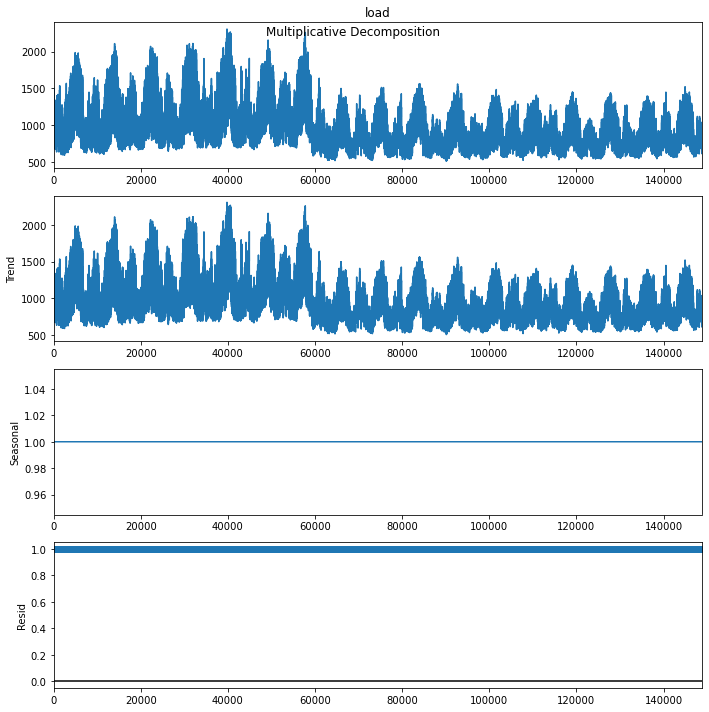

In [30]:
plt.rcParams.update({'figure.figsize' : (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decomposition',fontsize = 12)
plt.show()

### * We can see the trand component is more prominent

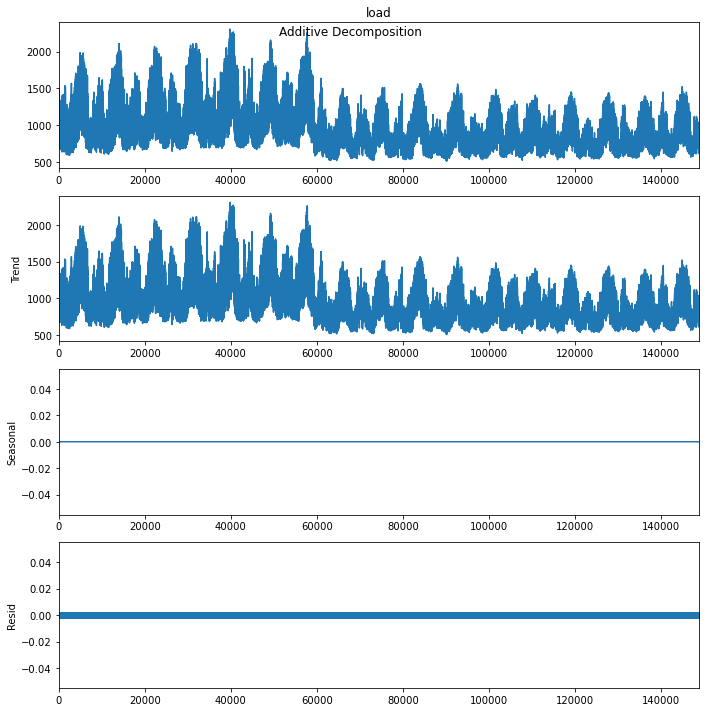

In [32]:
plt.rcParams.update({'figure.figsize' : (10,10)})
add_result.plot().suptitle('\nAdditive Decomposition',fontsize = 12)
plt.show()

In [33]:
### Close look in Seasonal and trand component
## Additive

new_df_add = pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
new_df_add.columns = ['seasoanility','trend','residual','actual_values']
new_df_add.head()


,seasoanility,trend,residual,actual_values
0,0.0,995.298392,0.0,995.298392
1,0.0,981.195477,0.0,981.195477
2,0.0,971.305257,0.0,971.305257
3,0.0,971.262963,0.0,971.262963
4,0.0,982.535591,0.0,982.535591


In [34]:
### Close look in Seasonal and trand component
## Multiplicative

new_df_mult = pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,mul_result.observed],axis=1)
new_df_mult.columns = ['seasoanility','trend','residual','actual_values']
new_df_mult.head()


,seasoanility,trend,residual,actual_values
0,1.0,995.298392,1.0,995.298392
1,1.0,981.195477,1.0,981.195477
2,1.0,971.305257,1.0,971.305257
3,1.0,971.262963,1.0,971.262963
4,1.0,982.535591,1.0,982.535591


## ADFULLER TEST FOR STATIONARY
### Definition of stationarity - constant mean and variance

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
# ADF test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis

adfuller_result = adfuller(data.load.values,autolag = 'AIC')


In [37]:
print(f'ADF Statistic : {adfuller_result[0]}')
print(f'p-value : {adfuller_result[1]}')


for key,value in adfuller_result[4].items():
    print('Critial Values')
    print(f'{key},{value}')


ADF Statistic : -11.640263940227893
p-value : 2.155415745577571e-21
Critial Values
1%,-3.4303939346750916
Critial Values
5%,-2.8615594185082887
Critial Values
10%,-2.566780335780227


### HOW TO MAKE A TIME SERIES STATIONARY
https://www.youtube.com/watch?v=52z_3wYz7XU&list=PLmPJQXJiMoUVr07-VnwDiki89DqyuSS21&index=6

## TIME Series lag Example
### Original Time series : {21,22,21,20,19}
### Lagged time series by 1 lag : {22,21,20,19}
### Lag 1 correlation will be correlation between {21,22,21,20} and {22,21,20,19}


## WHAT IS AUTOREGRESSION?
### A statistical model is autoregressive it it predicts future values based on part values
### ACF DEFINITION : A function which gives us values of auto-correlation of any series with its lagged values
### PACF DEFINITION : An indirect function to find the auto-correlation after removing the relationship explained by previous lags


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

matplotlib.rc('xtick',labelsize = 30)
matplotlib.rc('ytick',labelsize = 30)

import seaborn as sns
sns.set(style = "whitegrid",color_codes = True)

from statsmodels.tsa.stattools import acf,pacf

In [50]:
axisline = np.linspace(0,10,500)

#normal distribution values
normalnumbers = np.random.normal(0,10,500)

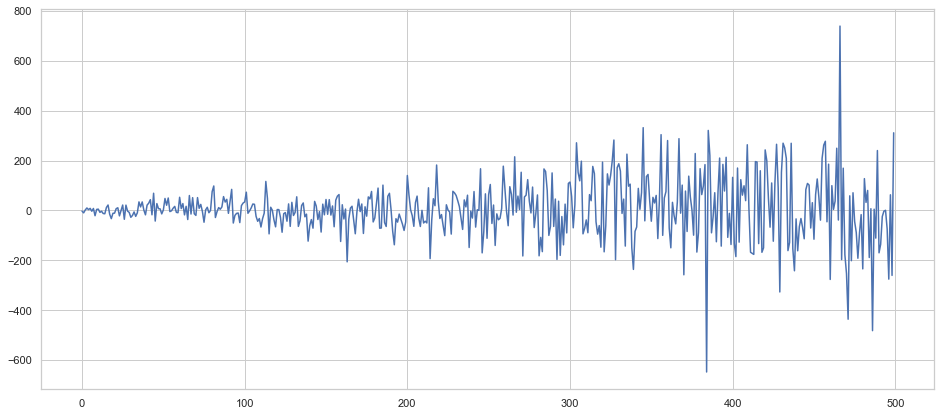

In [51]:
#exponential series to get the trend
exponentialData = np.exp(axisline**0.5)

#adding normally distributed series in exponential series

y = normalnumbers*exponentialData

#plot

plt.figure(figsize=(16,7))
plt.plot(y)
plt.show()

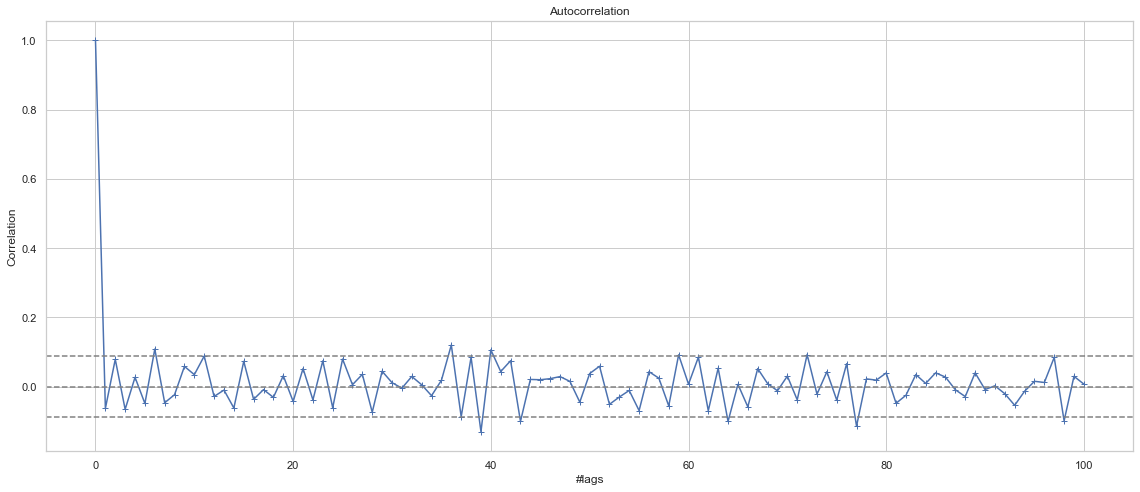

In [55]:
##Calling auto correlation function

ACF_lag = acf(y,nlags=100)

#plot ACF
plt.figure(figsize=(16,7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle = '--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle = '--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle = '--',color='gray')
plt.title('Autocorrelation')
plt.xlabel("#lags")
plt.ylabel("Correlation")
plt.tight_layout()




The first gray line is 95%  confidence interval above to zero

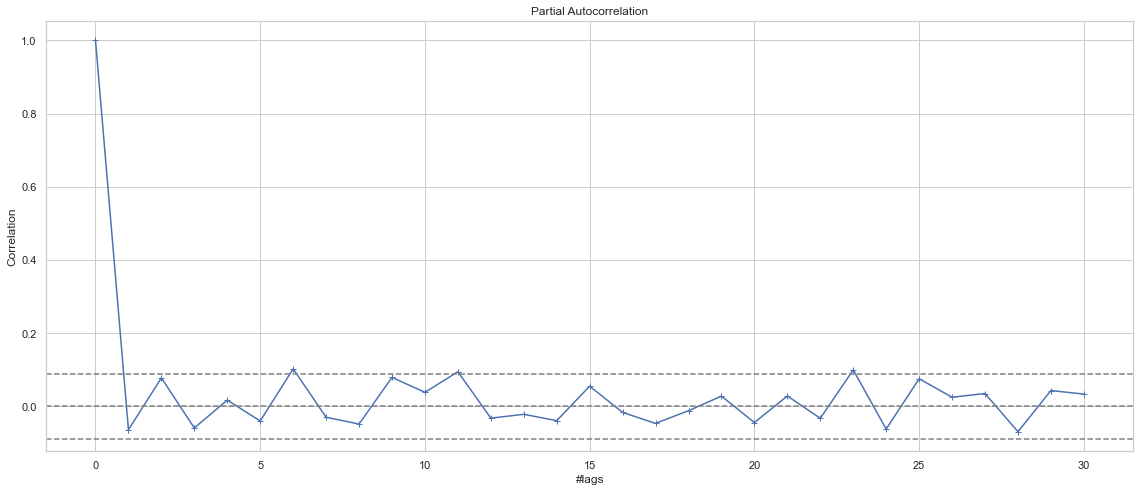

In [57]:
## TO avoid Multicollinearity used PACF

PACF_lag = pacf(y,nlags=30,method='ols')


#plot ACF
plt.figure(figsize=(16,7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle = '--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle = '--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle = '--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel("#lags")
plt.ylabel("Correlation")
plt.tight_layout()




## Time Series Forecasting method Part 1
https://www.youtube.com/watch?v=qEtKLt6Of3s&list=PLmPJQXJiMoUVr07-VnwDiki89DqyuSS21&index=7

Classical Time Series Models are 4 types
1- AR
2- MA
3- ARMA
4- ARIMA

In [58]:
import warnings
warnings.filterwarnings('ignore')

### Auto Regression Example

In [60]:
#Auto Regression Example - sutiable for data without trend and seasonal component

from statsmodels.tsa.ar_model import AutoReg

#create a linear data
data = [10,12,14,16,18,20,20,22] #Linear data


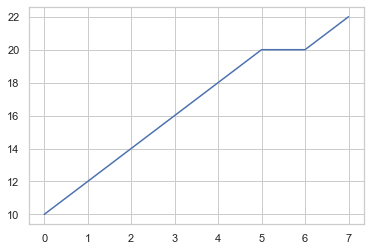

In [62]:
plt.plot(data)
plt.show()

In [64]:
ARmodel = AutoReg(data,lags=1) #calling auto regression model
ARmodel_fit = ARmodel.fit() #Fitted model

In [65]:
#making predictions
ypredicted = ARmodel_fit.predict(8,10)
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [66]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

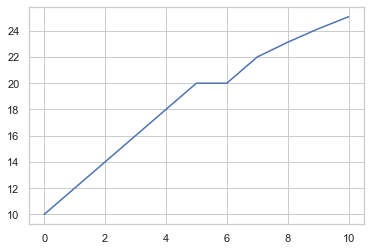

In [67]:
plt.plot(combinedlist)
plt.show()

## Moving average example

In [69]:
from statsmodels.tsa.arima_model import ARMA #suitable for data without trend and seasonality

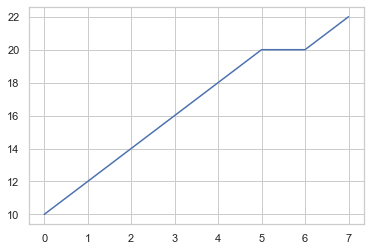

In [70]:
plt.plot(data)
plt.show()

In [73]:
#fit model
MAmodel = ARMA(data,order=(0,1)) #model with AR=0 and MA =1
MAmodel_fit = MAmodel.fit(disp = False)


In [74]:
#making predictions
ypredicted = MAmodel_fit.predict(8,10)
print(ypredicted)

[20.51276533 16.49884906 16.49884906]


In [75]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

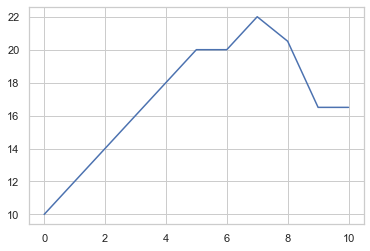

In [76]:
plt.plot(combinedlist)
plt.show()

### Note: We can see this chart is totaly different with Auto regression -- because Auto regression basically internally fit based of previous trends whereas Moving Average model take error of Residuals in considereaton then it forecaste the next value.

In real word auto-regressive and moving average that can not solve business problem indivisually, we need to commbine them

## Autoregressive Moving Average (ARMA)

In [98]:
data = electricTimeSeries[['load']][1:1000]

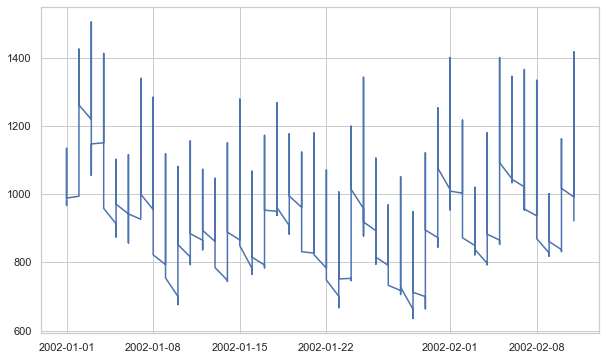

In [99]:
plt.rcParams.update({'figure.figsize':(10,6)})
plt.plot(data['load'])
plt.show()

In [100]:
data[['load']].head()

,load
2002-01-01,981.195477
2002-01-01,971.305257
2002-01-01,971.262963
2002-01-01,982.535591
2002-01-01,998.840116


In [101]:
#fit model
ARMAmodel = ARMA(data['load'],order=(1,1))
ARmodel_fit = ARMAmodel.fit(disp = False)

In [102]:
#Make prediction
ypredicted = ARmodel_fit.predict(len(data),len(data)+2)
print(ypredicted)

999     921.817419
1000    927.983107
1001    933.686840
dtype: float64


## Autoregressive Integrated Moving Average(ARIMA)

In [103]:
from statsmodels.tsa.arima_model import ARIMA

In [104]:
#fit model
ARIMAmodel = ARIMA(data['load'],order=(1,1,1)) #notice p,d and q value here
ARIMAmodel_fit = ARIMAmodel.fit(disp = False)

In [106]:
#Make prediction
ypredicted = ARIMAmodel_fit.predict(len(data),len(data)+2)
print(ypredicted)

998    -12.030101
999     -6.301814
1000    -3.324534
dtype: float64


_______________________________________________________________________________________________________________

### $$ End-to-End-Time-Series-Analysis$$
https://www.youtube.com/watch?v=Xi_Xs62WWCg&list=PLmPJQXJiMoUVr07-VnwDiki89DqyuSS21&index=8

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [108]:
Tempdata = pd.read_csv('GlobalLandTemperaturesByCity.csv')
Tempdata.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [111]:
#Data Cleaning

Tempdata = Tempdata.dropna()
df_Denmark = Tempdata[Tempdata.Country == 'Denmark']
df_Denmark.index = pd.to_datetime(df_Denmark.dt)

df_Denmark = df_Denmark.drop(['dt','AverageTemperatureUncertainty'],axis = 1)
df_Denmark.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [112]:
ts = df_Denmark['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

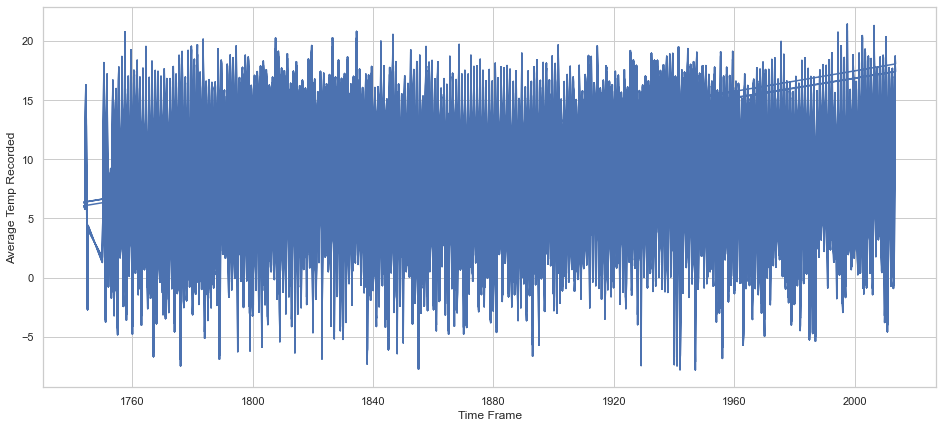

In [116]:
#Data Exploration

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)
plt.show()

In [117]:
#Perform Augmented Dicky-Fuller test:
#ADF Test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis

adfuller_result = adfuller(ts,autolag='AIC')

print(f'ADF Statistic : {adfuller_result[0]}')
print(f'p-value : {adfuller_result[1]}')


for key,value in adfuller_result[4].items():
    print('Critial Values')
    print(f'{key},{value}')


ADF Statistic : -14.764430391800593
p-value : 2.3746970456360684e-27
Critial Values
1%,-3.430868192869495
Critial Values
5%,-2.86176901566292
Critial Values
10%,-2.566891900059256


In [118]:
#First Model
newmodel = ARMA(ts,order=(1,1))
results = newmodel.fit()

predictions = results.predict('01/01/1990','01/01/1991')

In [127]:
df_Denmark.index = pd.to_datetime(df_Denmark.index)

In [129]:
df_Denmark.head()

,AverageTemperature,City,Country,Latitude,Longitude
dt,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,Århus,Denmark,57.05N,10.33E


In [149]:
actual = df_Denmark[(df_Denmark.index >='1990-01-01') & (df_Denmark.index<='1991-01-01')]['AverageTemperature'][0:13]
#actuals = df_Denmark['1990-01-01':'1991-01-01']

In [151]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual[0:13],predictions)
print('MAE: %f' % mae)

MAE: 1.812791


#### Note: In first model "ARMA(ts,order=(1,1))", I have given AR=1 and MA = 1,I do not know what is best AR and best MA for my data, at a starting point I have stated as 1,1

#### Model Tuning

In [154]:
import itertools

i = j = range(0,4)
ij = itertools.product(i,j)

for parameters in ij:
    try:
        mod = ARMA(ts,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters,results.aic))
    except:
        continue

ARMA(0, 0) - AIC:83922.21129983963
ARMA(0, 1) - AIC:72682.7946395372
ARMA(0, 3) - AIC:63785.44572705227
ARMA(1, 0) - AIC:69020.3114679126
ARMA(1, 1) - AIC:65268.1042160979
ARMA(1, 2) - AIC:63179.84801382823
ARMA(1, 3) - AIC:66639.60428407842
ARMA(2, 0) - AIC:60366.309092605705
ARMA(2, 2) - AIC:52219.29608269165
ARMA(2, 3) - AIC:50711.73251434967
ARMA(3, 0) - AIC:56175.945552179706
ARMA(3, 1) - AIC:53338.634992009385
ARMA(3, 2) - AIC:50395.18068724312
ARMA(3, 3) - AIC:50388.80515034101


In [155]:
predictions = results.predict('01/01/1990','01/01/1991')

mae = mean_absolute_error(actual[0:13],predictions)
print('MAE: %f' % mae)

MAE: 1.494368


----------------------------------------------------------------------------------------------------------------

## END to END Time Series Forecasting using ARIMA
https://www.youtube.com/watch?v=MVsKaYzEggY&list=PLmPJQXJiMoUVr07-VnwDiki89DqyuSS21&index=9

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

TempData = pd.read_csv("HCLTECH.csv")
TempData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [159]:
#Data Cleaning

HCLTechStockData = TempData.dropna()
HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)

HCLTechStockData = HCLTechStockData['Prev Close']['2013-01-01' : '2013-12-02']
HCLTechStockData.describe()



count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

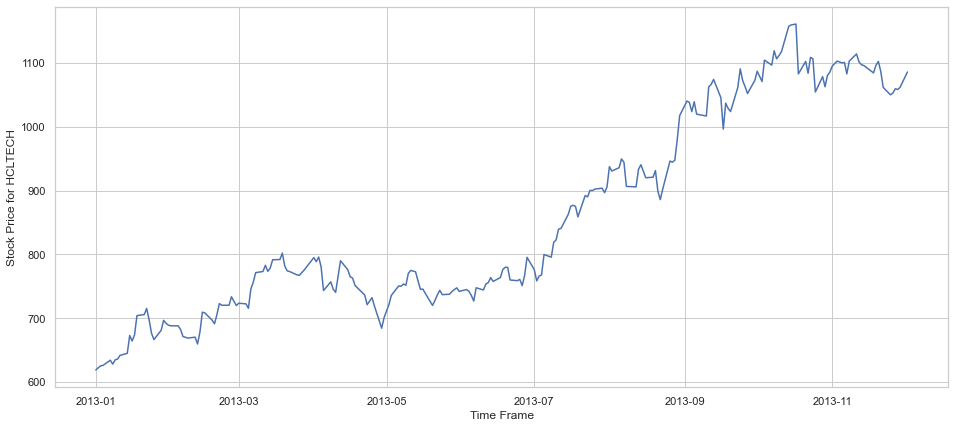

In [160]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)
plt.show()

#### Checking Stationarity
* Method 1 - Rolling Statistics
* Method 2 - Duckey Fuller


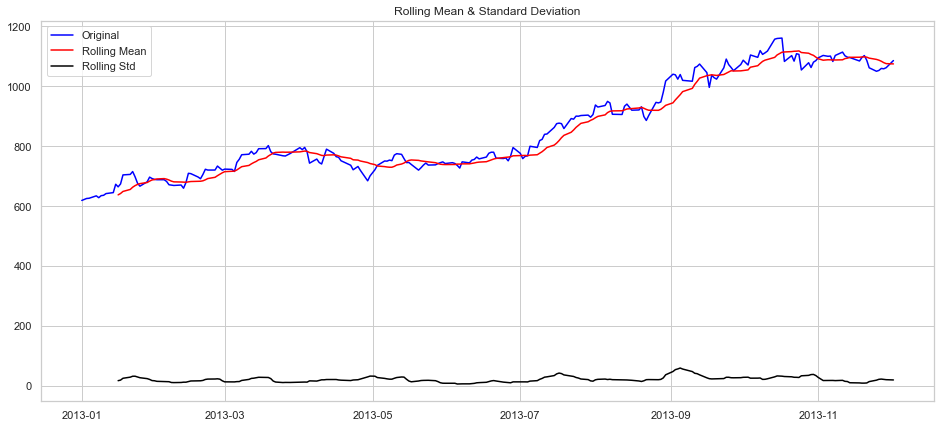

In [163]:
#Determing rolling statistics

rollmean = HCLTechStockData.rolling(12).mean()#rolling mean of 12 enteries
rollstd = HCLTechStockData.rolling(12).std())#rolling std of 12 enteries

plt.figure(figsize=(16,7))
fig = plt.figure(1)


#plot rolling statistics
orig = plt.plot(HCLTechStockData,color = 'blue',label='Original')
mean = plt.plot(rollmean,color = 'red',label='Rolling Mean')
std = plt.plot(rollstd,color = 'black',label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)


##### Note: we can see rolling Std is constant over period of time but rolling mean is not constant, By definition of stationarity mean and Std both should be constant

### MAKING SERIES STATIONARY 

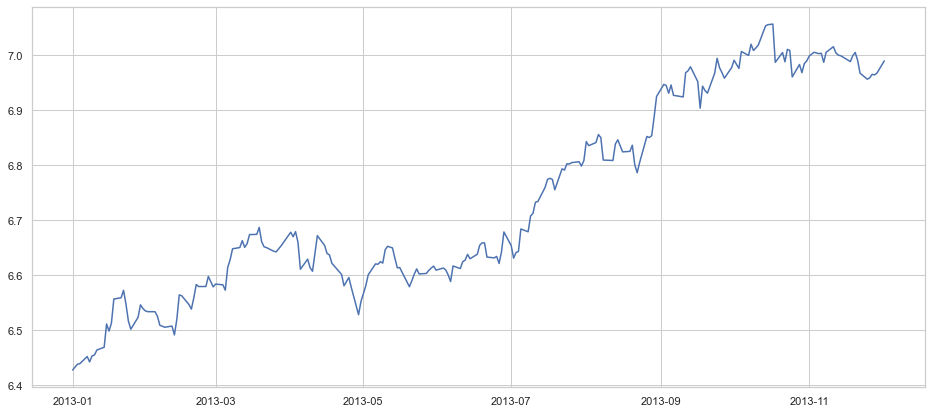

In [164]:
## lets try transformation

plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData) # we can use other transformation also Square root / Q etc
plt.plot(ts_log)
plt.show()

After log transformation we can see still it is not Satatinary, To ensure it is not stationary let's do Decomposition.

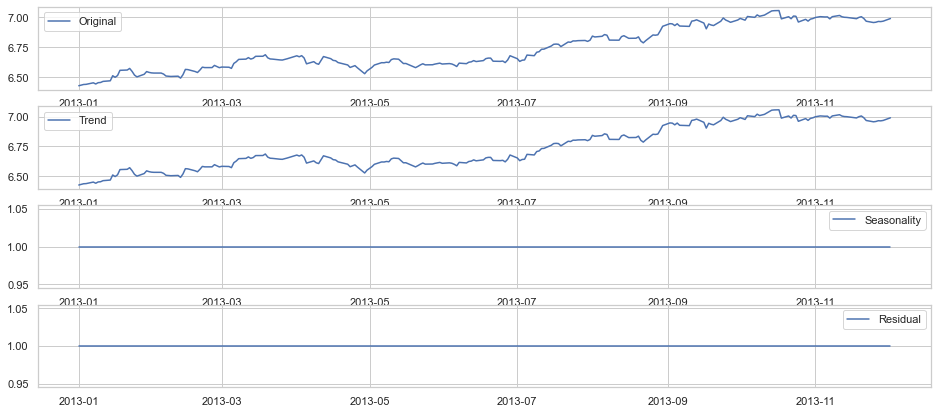

In [168]:
#Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log,label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = 'Residual')
plt.legend(loc='best')

plt.show()


Note : It is evedent that Trend component is contributing to original data

<Figure size 1152x504 with 0 Axes>

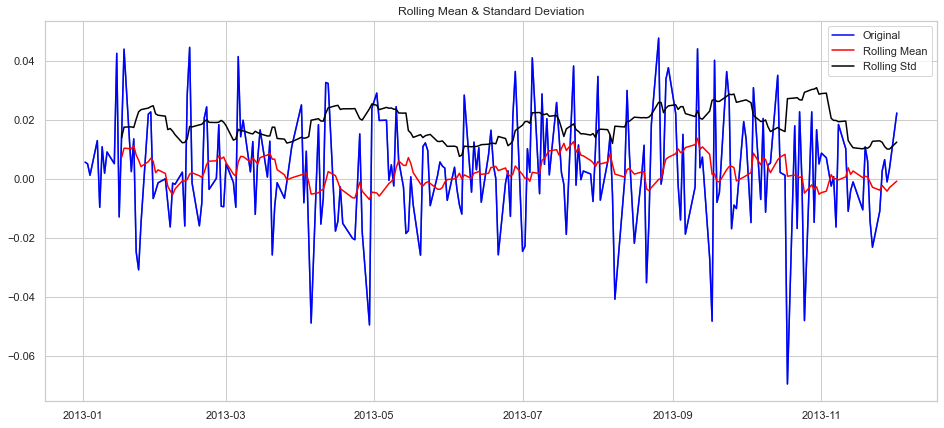

In [172]:
## Lets try differencing 
plt.figure(figsize=(16,7))
fig = plt.figure(1)

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


#Determing rolling statistics

rollmean = ts_log_diff.rolling(12).mean()#rolling mean of 12 enteries
rollstd = ts_log_diff.rolling(12).std()#rolling std of 12 enteries

plt.figure(figsize=(16,7))
fig = plt.figure(1)


#plot rolling statistics
orig = plt.plot(ts_log_diff,color = 'blue',label='Original')
mean = plt.plot(rollmean,color = 'red',label='Rolling Mean')
std = plt.plot(rollstd,color = 'black',label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)


Now we can assume that there is not much differece in Mean as well as in Std. For croos validation we can do Duckey Fuller test.

In [173]:
HCLTechStockData.sort_index(inplace=True)

In [175]:
from statsmodels.tsa.stattools import acf,pacf #there are important for what is the order of AR and MA for ARIMA Model

lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20)

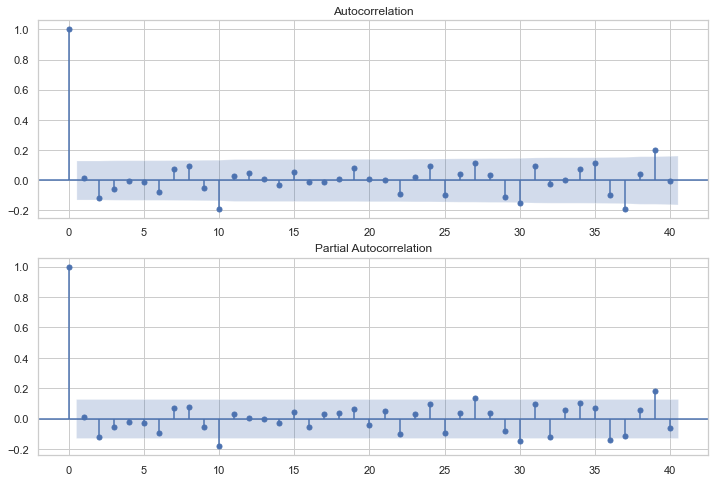

In [177]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)
plt.show()



Note : the higlighted part is called as confidential interval, we can see in Autocorrelation plot, considering point 2, which is just touching the confidential interval Boundary.So I can consider the Order of AR is 2,Same from Partial Autocorrelation we can consider the MA is 2. At starting point I don't know which is best fit we are starting (2,0,2), keeping d=0.

In [178]:
from statsmodels.tsa.arima_model import ARIMA

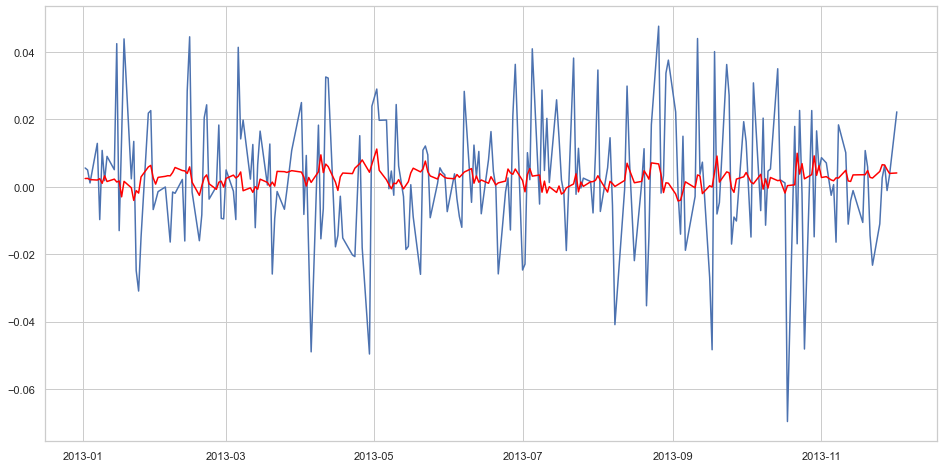

In [179]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log,order=(2,1,2))
result_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.show()

## Taking results back to Original scale

In [181]:
ARIMA_diff_predictions = pd.Series(result_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.002432
2013-01-03    0.002471
2013-01-04    0.002117
2013-01-07    0.001981
2013-01-08    0.002377
dtype: float64


In [182]:
#cummulative sum with differenced the time series
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())


Date
2013-01-02    0.002432
2013-01-03    0.004903
2013-01-04    0.007021
2013-01-07    0.009002
2013-01-08    0.011379
dtype: float64


In [183]:
ARIMA_log_Prediction = pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_Prediction = ARIMA_log_Prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0) #compansate the difference
ARIMA_log_Prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.430053
2013-01-03    6.432524
2013-01-04    6.434641
2013-01-07    6.436622
dtype: float64

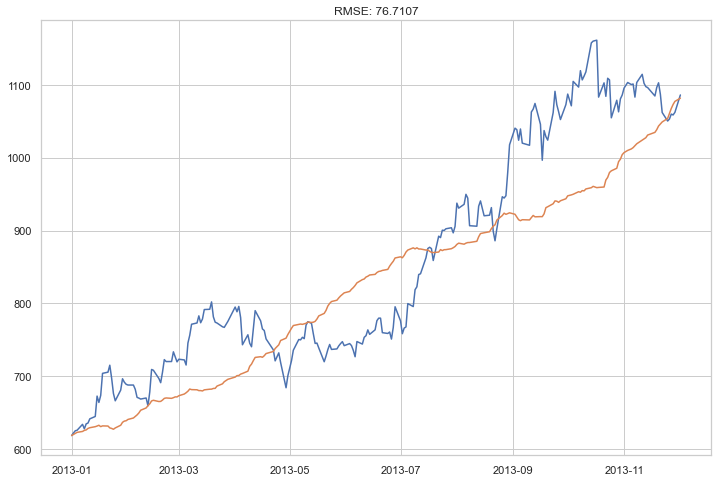

In [185]:
plt.figure(figsize=(12,8))
prediction_ARIMA = np.exp(ARIMA_log_Prediction)
plt.plot(HCLTechStockData)
plt.plot(prediction_ARIMA)
plt.title('RMSE: %.4f' % np.sqrt(sum((prediction_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))
plt.show()

In [186]:
##predict
result_ARIMA.predict(10,20)

Date
2013-01-15    0.001398
2013-01-16    0.001704
2013-01-17   -0.002997
2013-01-18    0.001599
2013-01-21   -0.000306
2013-01-22   -0.004052
2013-01-23   -0.001140
2013-01-24   -0.001885
2013-01-25    0.002912
2013-01-28    0.005861
2013-01-29    0.006331
dtype: float64

In [191]:
## We can refine aour model using auto arima

import pmdarima as pm

In [192]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,start_p=3,start_q=3,max_p=5,max_q=5,test="adf",seasonal=True,trace=True)
    return automodel


In [193]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.015, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.775 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)